95.14608 0.0 28.580488 0.0 0.3014442


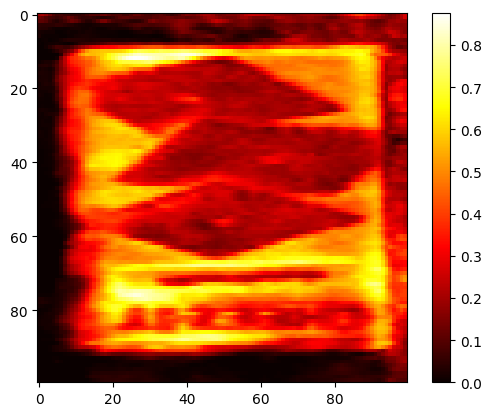

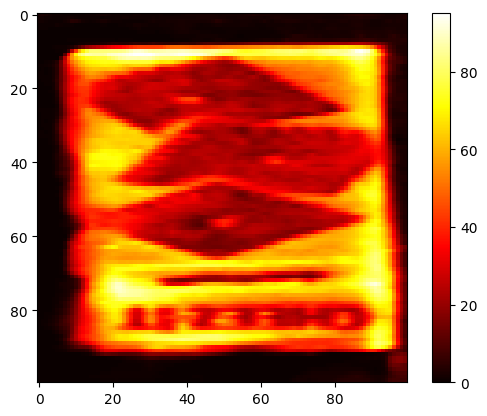

84.481384 0.0 17.934753 0.0 0.39025763


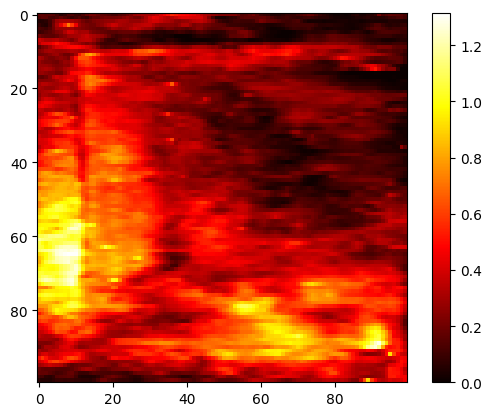

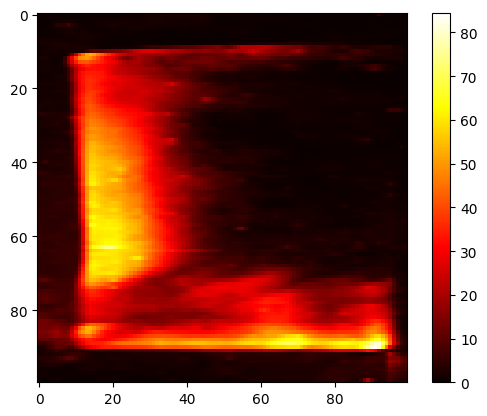

91.82899 0.0 24.292627 0.0 0.26799297


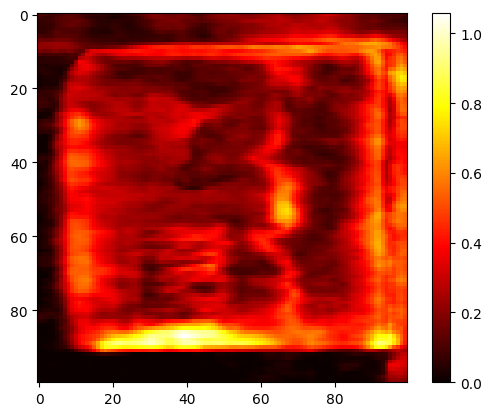

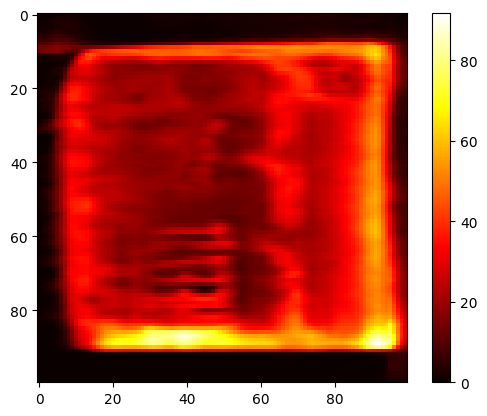

106.77461 0.070828035 24.420414 0.20566092 0.34687397


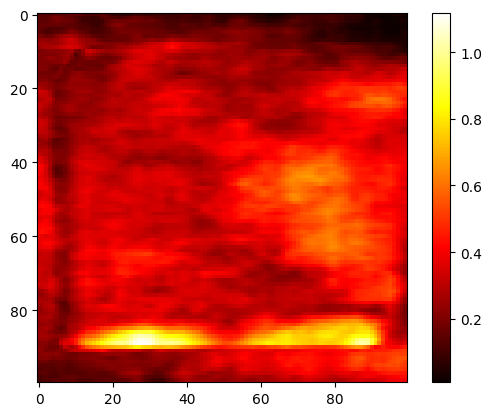

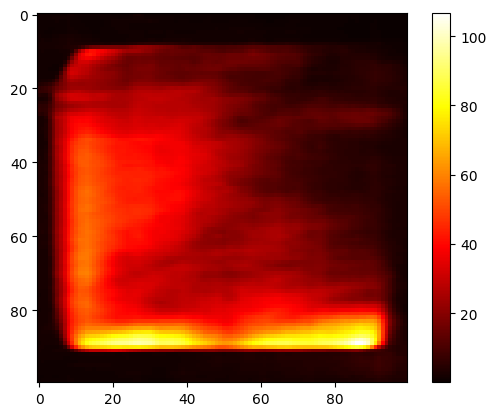

195.40942 0.0 53.925373 0.0 0.38798234


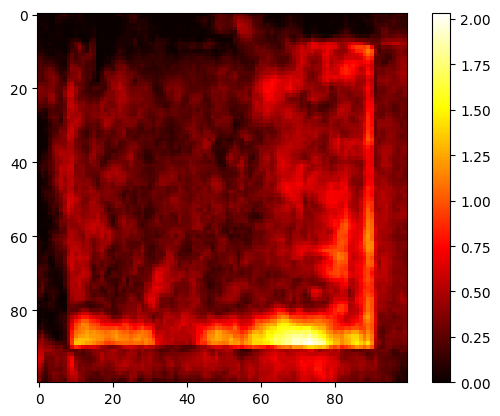

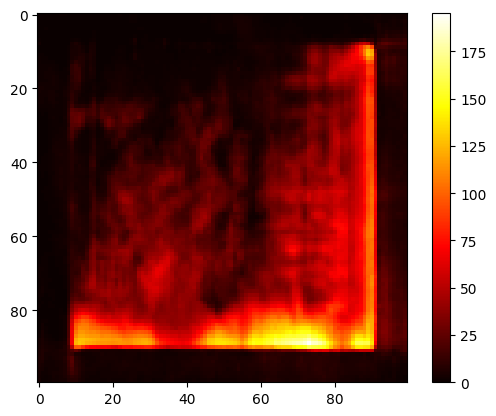

120.21598 0.0 54.99449 0.0 0.3205956


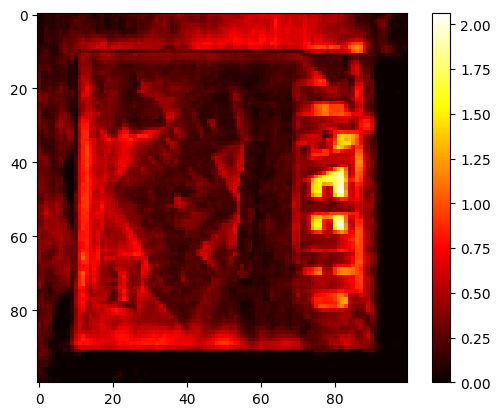

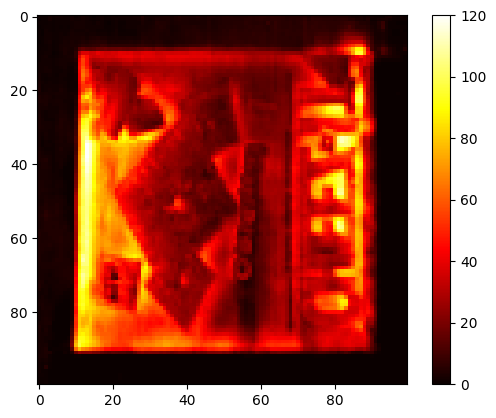

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
num_models = 10
input_dir_prefix_name = "cheezit_triple_ep25_"
output_dir_name = f"{input_dir_prefix_name}_results_100x100_num_models_10_delta0.3"

input_dir_prefix = f"density_data/{input_dir_prefix_name}"
output_dir = f'density_results/{output_dir_name}'


os.makedirs(output_dir, exist_ok=True)
avg_stds = []
dic = {0:"+x", 1:"-x", 2:"+y", 3:"-y", 4:"+z", 5:"-z"}
for j in range(6):
    densities = []
    for i in range(1, num_models+1):
        d = np.load(f"{input_dir_prefix}{i}/d_{j}.npy")
        densities.append(d)
    # densities = np.array(densities)

    means = np.mean(densities, axis=0)
    means = means.reshape(100,100)
    stds = np.std(densities, axis=0).reshape(100,100)

    norm_std = stds/means.mean()
    avg_stds.append(norm_std.mean())
    print(means.max(), means.min(), stds.max(), stds.min(), norm_std.mean())
    plt.clf()
    plt.imshow(norm_std, cmap="hot")
    plt.colorbar()
    plt.savefig(f"{output_dir}/std_{dic[j]}.png")
    # plt.show()
    plt.clf()
    plt.imshow(means, cmap="hot")
    plt.colorbar()
    plt.savefig(f"{output_dir}/mean_{dic[j]}.png")
    # plt.show()
with open(f"{output_dir}/avg_stds.txt", "w") as f:
    f.write(str(avg_stds))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
dir_name = "temp"
input_dir_prefix = "cheezit"

os.makedirs(dir_name, exist_ok=True)
dic = {0:"+x", 1:"-x", 2:"+y", 3:"-y", 4:"+z", 5:"-z"}
for j in range(6):
    densities = []
    for i in range(1):
        d = np.load(f"cheezit1/d_{j}.npy")
        densities.append(d)
    densities = np.array(densities)

    means = np.mean(densities, axis=0)
    # means = means.reshape(100,100)
    stds = np.std(densities, axis=0)
    print(stds.shape)
    # create heat map of stds with scale 100x
    # plt.figure(figsize=(,10))
    print(means.max(), means.min(), stds.max(), stds.min())
    plt.clf()
    # plt.imshow(stds, cmap="hot")
    # plt.colorbar()
    # plt.savefig(f"{dir_name}/std_{dic[j]}.png")
    # plt.show()
    plt.clf()
    plt.imshow(means, cmap="hot")
    plt.colorbar()
    # plt.savefig(f"{dir_name}/mean_{dic[j]}.png")
    plt.show()

Mask dir does not exist
../_results_new/cheezit_single_side_2d_new_epi/model_1/20230805-175639
../_results_new/cheezit_single_side_2d_new_epi/model_2/20230805-175722
../_results_new/cheezit_single_side_2d_new_epi/model_3/20230805-175805
../_results_new/cheezit_single_side_2d_new_epi/model_4/20230805-175847
../_results_new/cheezit_single_side_2d_new_epi/model_5/20230805-175931
../_results_new/cheezit_single_side_2d_new_epi/model_6/20230805-180016
../_results_new/cheezit_single_side_2d_new_epi/model_7/20230805-180058
../_results_new/cheezit_single_side_2d_new_epi/model_8/20230805-180140
../_results_new/cheezit_single_side_2d_new_epi/model_9/20230805-180224
../_results_new/cheezit_single_side_2d_new_epi/model_10/20230805-180307
(10, 400, 200, 200, 3)
(400, 200, 200)
0-lod15.npy
0.12797002 0.018568950238980815
1-lod15.npy
0.12865546 0.016077546701045956
10-lod15.npy
0.13021782 0.009690926492925491
100-lod15.npy
0.129857 0.008684182556838468
101-lod15.npy
0.13061336 0.007253073207357008
102

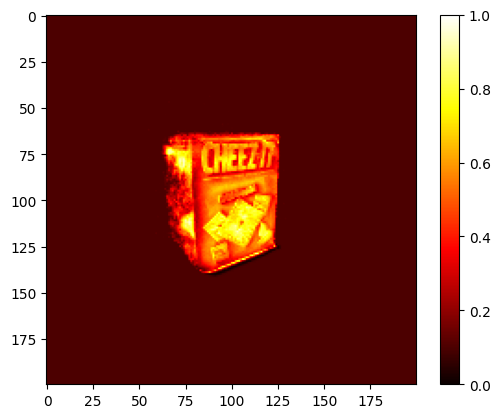

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model_name = "cheezit_single_side_2d_new_epi"
root_dir = '../_results_new/' + model_name + '/'
mask_dir = '../avg_masks/' + model_name + '/nobg/mask/'
out_root_dir = "../density_aware_results/" + model_name + '/'

mask_exists = True
if not os.path.exists(mask_dir):
    mask_exists = False
    print("Mask dir does not exist")
os.makedirs(out_root_dir, exist_ok=True)
os.makedirs(out_root_dir + 'epi/', exist_ok=True)
os.makedirs(out_root_dir + 'rgb/', exist_ok=True)
os.makedirs(out_root_dir + 'total/', exist_ok=True)


all_epis = []
all_images = []

for i in range(1,11):
    model_dir = os.path.join(root_dir, f"model_{i}")
    val_dir = os.path.join(model_dir, list(sorted(os.listdir(model_dir)))[0])
    print(val_dir)
    epi_val_dir = os.path.join(val_dir, "epistemic_val")
    im_val_dir = os.path.join(val_dir, "val")

    epis = []
    for epi_file in sorted(os.listdir(epi_val_dir)):
        epis.append(np.load(os.path.join(epi_val_dir, epi_file)))
    epis = np.array(epis)
    all_epis.append(epis)

    images = []
    for im in sorted(os.listdir(im_val_dir)):
        images.append(cv2.imread(os.path.join(im_val_dir, im)))
    images = np.array(images)
    all_images.append(images)

all_epis = np.array(all_epis).squeeze()
all_images = np.array(all_images).squeeze()
print(all_images.shape)

ensemble_epis = np.mean(all_epis, axis=0)
ensemble_image_std = np.sqrt(np.var(all_images, axis=0).sum(axis=-1))
print(ensemble_image_std.shape)


files = sorted(os.listdir(epi_val_dir))
epi = (1 - ensemble_epis)**2
rgb = ensemble_image_std

epi = epi / epi.max()
rgb = rgb / rgb.max()

epi_means = {}
rgb_means = {}
tot_means = {}
epi_perc90 = {}
rgb_perc90 = {}
tot_perc90 = {}
epi_mask_means = {}
rgb_mask_means = {}
tot_mask_means = {}

for i in range(len(files)):
    filename = files[i].split('.')[0]
    print(files[i])  
    print(epi[i].mean(), rgb[i].mean())

    epi_means[filename] = float(epi[i].mean())
    rgb_means[filename] = float(rgb[i].mean())
    tot_means[filename] = float(epi[i].mean() + rgb[i].mean())

    epi_perc90[filename] = float(np.percentile(epi[i], 90))
    rgb_perc90[filename] = float(np.percentile(rgb[i], 90))
    tot_perc90[filename] = float(np.percentile(epi[i] + rgb[i], 90))

    if mask_exists:
        mask = cv2.imread(os.path.join(mask_dir, filename + '.png'))[:,:,0]
        mask = mask / mask.max()
        epi_mask_means[filename] = float((epi[i] * mask).sum()/mask.sum())
        rgb_mask_means[filename] = float((rgb[i] * mask).sum()/mask.sum())
        tot_mask_means[filename] = float(((epi[i] + rgb[i]) * mask).sum()/mask.sum())
    
    plt.clf()
    plt.imshow(rgb[i], cmap="hot", vmin=0, vmax=1)
    plt.colorbar()
    plt.savefig(f"{out_root_dir}rgb/{filename}.png")
    # plt.show()

    plt.clf()
    plt.imshow(epi[i], cmap="hot", vmin=0, vmax=1)
    plt.colorbar()
    plt.savefig(f"{out_root_dir}epi/{filename}.png")
    # plt.show()

    plt.clf()
    plt.imshow(rgb[i] + epi[i], cmap="hot", vmin=0, vmax=1)
    plt.colorbar()
    plt.savefig(f"{out_root_dir}total/{filename}.png")
    # plt.show()

import json
json.dump(epi_means, open(f"{out_root_dir}/epi_means.json", "w"))
json.dump(rgb_means, open(f"{out_root_dir}/rgb_means.json", "w"))
json.dump(tot_means, open(f"{out_root_dir}/total_means.json", "w"))

json.dump(epi_perc90, open(f"{out_root_dir}/epi_perc90.json", "w"))
json.dump(rgb_perc90, open(f"{out_root_dir}/rgb_perc90.json", "w"))
json.dump(tot_perc90, open(f"{out_root_dir}/total_perc90.json", "w"))

if mask_exists:
    json.dump(epi_mask_means, open(f"{out_root_dir}/epi_masked_means.json", "w"))
    json.dump(rgb_mask_means, open(f"{out_root_dir}/rgb_masked_means.json", "w"))
    json.dump(tot_mask_means, open(f"{out_root_dir}/total_masked_means.json", "w"))

In [2]:
out = None
for i in [99] + list(range(49)):
# for i in range(-1,49):
    image = cv2.imread(f"../density_aware_results/{model_name}/rgb/{i}-lod15.png")
    size = image.shape[:2]
    if out is None:
        out = cv2.VideoWriter(
            f"../density_aware_results/{model_name}/rgb/video_ver.avi", 
            cv2.VideoWriter_fourcc(*'XVID'), 10, 
            (size[1],size[0])
        )
        
    out.write(image)
out.release()

In [3]:
out = None
for i in range(49, 99):
    image = cv2.imread(f"../density_aware_results/{model_name}/rgb/{i}-lod15.png")
    size = image.shape[:2]
    if out is None:
        out = cv2.VideoWriter(
            f"../density_aware_results/{model_name}/rgb/video_hor.avi", 
            cv2.VideoWriter_fourcc(*'XVID'), 10, 
            (size[1],size[0])
        )
    out.write(image)
out.release()

In [1]:
model_name = "cheezit_single_side_2d_new_epi"

import json
means_file = f"../density_aware_results/{model_name}/rgb_means.json"
means = json.load(open(means_file))
perc_file = f"../density_aware_results/{model_name}/rgb_perc90.json"
perc = json.load(open(perc_file))

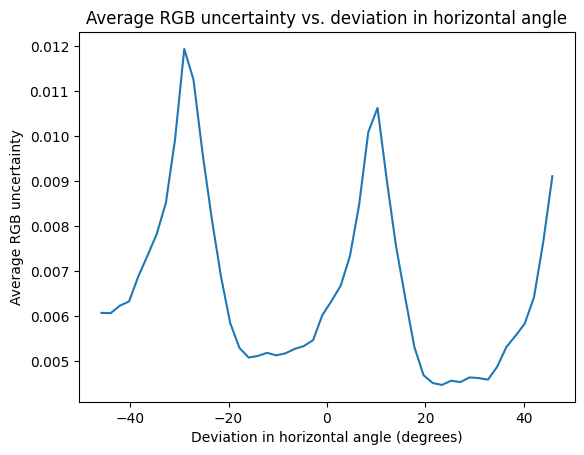

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

means_file = f"../density_aware_results/{model_name}/rgb_means.json"
means = json.load(open(means_file))
ver = []
hor = []
vert_id = [99] + list(range(49))
vert_id.reverse()
for i in vert_id:
    ver.append(float(means[f'{i}-lod15']))
for i in range(49, 99):
    hor.append(float(means[f'{i}-lod15']))
import math
labels = np.linspace(-0.8*(180/math.pi), 0.8*(180/math.pi), 50)
plt.plot(labels, ver)
plt.xlabel("Deviation in vertical angle (degrees)")
plt.ylabel("Average RGB uncertainty")
plt.title("Average RGB uncertainty vs. deviation in vertical angle")
os.makedirs(f"../density_aware_results/{model_name}/plots", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/plots/mean_ver.png")
plt.clf()
plt.plot(labels, hor)
plt.xlabel("Deviation in horizontal angle (degrees)")
plt.ylabel("Average RGB uncertainty")
plt.title("Average RGB uncertainty vs. deviation in horizontal angle")
plt.savefig(f"../density_aware_results/{model_name}/plots/mean_hor.png")

In [3]:
# same for masked mean
masked_means_file = f"../density_aware_results/{model_name}/rgb_masked_means.json"
masked_means = json.load(open(masked_means_file))
ver = []
hor = []
vert_id = [99] + list(range(49))
vert_id.reverse()
for i in vert_id:
    ver.append(float(masked_means[f'{i}-lod15']))
for i in range(49, 99):
    hor.append(float(masked_means[f'{i}-lod15']))
import math
labels = np.linspace(-0.8*(180/math.pi), 0.8*(180/math.pi), 50)
plt.plot(labels, ver)
plt.xlabel("Deviation in vertical angle (degrees)")
plt.ylabel("Maked average RGB uncertainty")
plt.title("Maked average RGB uncertainty vs. deviation in vertical angle")
os.makedirs(f"../density_aware_results/{model_name}/plots", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/plots/mean_masked_ver.png")
plt.clf()
plt.plot(labels, hor)
plt.xlabel("Deviation in horizontal angle (degrees)")
plt.ylabel("Maked average RGB uncertainty")
plt.title("Maked average RGB uncertainty vs. deviation in horizontal angle")
plt.savefig(f"../density_aware_results/{model_name}/plots/mean_masked_hor.png")


FileNotFoundError: [Errno 2] No such file or directory: '../density_aware_results/cheezit_single_side_2d_new_epi/rgb_masked_means.json'

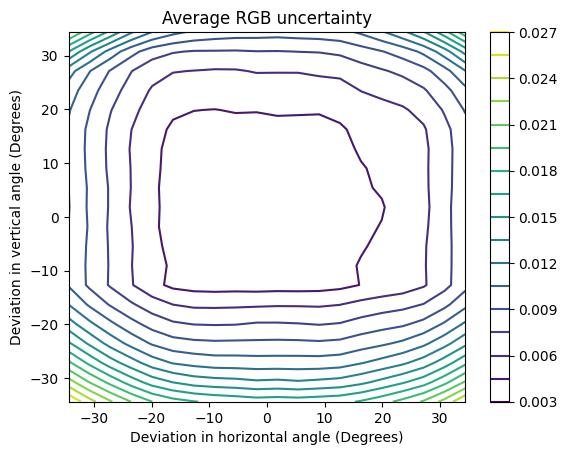

In [7]:
import json
means_file = f"../density_aware_results/{model_name}/rgb_means.json"
means = json.load(open(means_file))
var = np.zeros((20, 20))
ids =  [399] + list(range(399))
for i in range(20):
    for j in range(20):
        k = j + 20* (19-i)
        # print(i, j, k, ids[k], means[f'{ids[k]}-lod15'])
        var[i,j] = float(means[f'{ids[k]}-lod15'])
import math
labels_x = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)
labels_y = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)

plt.clf()
plt.contour(labels_x, labels_y, var, 20)
plt.xlabel("Deviation in horizontal angle (Degrees)")
plt.ylabel("Deviation in vertical angle (Degrees)")
plt.colorbar()
plt.title("Average RGB uncertainty")
os.makedirs(f"../density_aware_results/{model_name}/contours", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/contours/mean_contour.png")

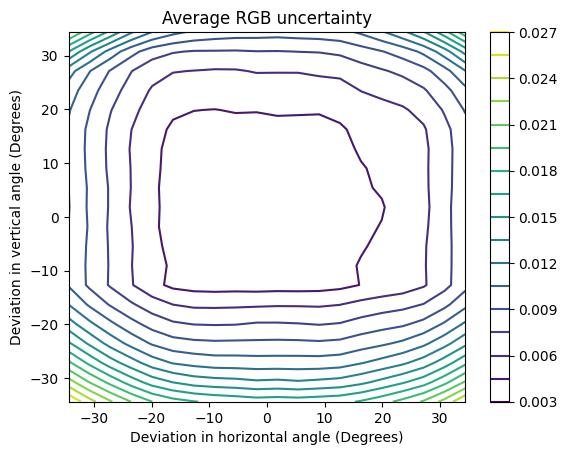

In [9]:
# EpistemicMeans 2D contour plots
import json
means_file = f"../density_aware_results/{model_name}/epi_means.json"
means = json.load(open(means_file))
var = np.zeros((20, 20))
ids =  [399] + list(range(399))
for i in range(20):
    for j in range(20):
        k = j + 20* (19-i)
        # print(i, j, k, ids[k], means[f'{ids[k]}-lod15'])
        var[i,j] = float(means[f'{ids[k]}-lod15'])
import math
labels_x = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)
labels_y = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)

plt.clf()
plt.contour(labels_x, labels_y, var, 20)
plt.xlabel("Deviation in horizontal angle (Degrees)")
plt.ylabel("Deviation in vertical angle (Degrees)")
plt.colorbar()
plt.title("Average Epistemic uncertainty")
os.makedirs(f"../density_aware_results/{model_name}/contours", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/contours/epi_mean_contour.png")

0 0 380 379 0.20469627003996244
0 1 381 380 0.19554574328205557
0 2 382 381 0.18940689431074959
0 3 383 382 0.18535552748832357
0 4 384 383 0.18220785872071704
0 5 385 384 0.18044932770762348
0 6 386 385 0.17902897379876134
0 7 387 386 0.17761659128083523
0 8 388 387 0.17733100913956068
0 9 389 388 0.17686289758633028
0 10 390 389 0.17779688037609873
0 11 391 390 0.1779561114570271
0 12 392 391 0.17850607968701196
0 13 393 392 0.17951570901709404
0 14 394 393 0.17997557263866634
0 15 395 394 0.18140517812613274
0 16 396 395 0.18492060385426692
0 17 397 396 0.19052347549161905
0 18 398 397 0.1981688595355093
0 19 399 398 0.20785702750327711
1 0 360 359 0.1821854063800337
1 1 361 360 0.1774424723470889
1 2 362 361 0.1740090509523589
1 3 363 362 0.1712884489543586
1 4 364 363 0.17040616768408098
1 5 365 364 0.16813781731917335
1 6 366 365 0.16760349617025655
1 7 367 366 0.1662370314761414
1 8 368 367 0.165376878182726
1 9 369 368 0.16472687082199897
1 10 370 369 0.16495463851903933
1 11 3

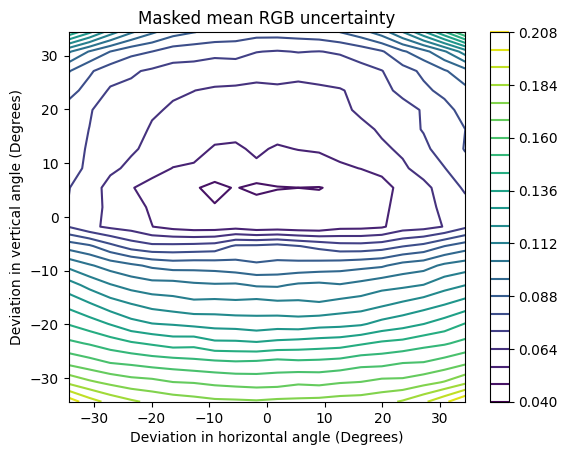

In [45]:
masked_mean_file = f"../density_aware_results/{model_name}/rgb_masked_means.json"
masked_means = json.load(open(masked_mean_file))
var = np.zeros((20, 20))
ids =  [399] + list(range(399))
for i in range(20):
    for j in range(20):
        k = j + 20* (19-i)
        # print(i, j, k, ids[k], masked_means[f'{ids[k]}-lod15'])
        var[i,j] = float(masked_means[f'{ids[k]}-lod15'])
import math
labels_x = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)
labels_y = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)

plt.clf()
plt.contour(labels_x, labels_y, var, 20)
plt.xlabel("Deviation in horizontal angle (Degrees)")
plt.ylabel("Deviation in vertical angle (Degrees)")
plt.colorbar()
plt.title("Masked average RGB uncertainty")
os.makedirs(f"../density_aware_results/{model_name}/contours", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/contours/masked_mean_contour.png")

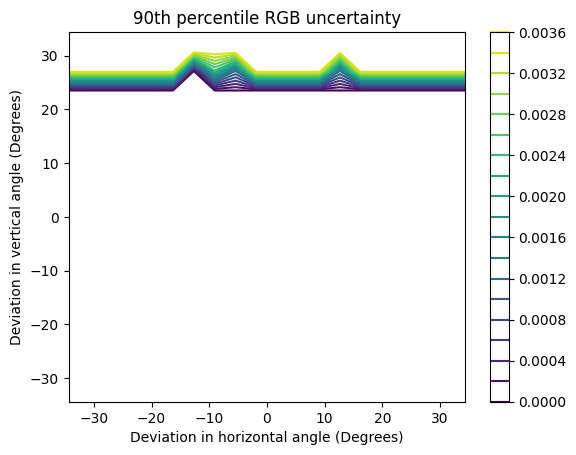

In [46]:
perc_file = f"../density_aware_results/{model_name}/rgb_perc90.json"
perc = json.load(open(perc_file))
var = np.zeros((20, 20))
ids =  [399] + list(range(399))
for i in range(20):
    for j in range(20):
        k = j + 20* (19-i)
        # print(i, j, k)
        var[i,j] = float(perc[f'{ids[k]}-lod15'])
import math
labels_x = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)
labels_y = np.linspace(-0.6*(180/math.pi), 0.6*(180/math.pi), 20)

plt.clf()
plt.contour(labels_x, labels_y, var, 20)
plt.xlabel("Deviation in horizontal angle (Degrees)")
plt.ylabel("Deviation in vertical angle (Degrees)")
plt.colorbar()
plt.title("90th percentile RGB uncertainty")
os.makedirs(f"../density_aware_results/{model_name}/contours", exist_ok=True)
plt.savefig(f"../density_aware_results/{model_name}/contours/perc_contour.png")

In [14]:
labels_x

array([-34.37746771, -30.7587869 , -27.14010609, -23.52142527,
       -19.90274446, -16.28406365, -12.66538284,  -9.04670203,
        -5.42802122,  -1.80934041,   1.80934041,   5.42802122,
         9.04670203,  12.66538284,  16.28406365,  19.90274446,
        23.52142527,  27.14010609,  30.7587869 ,  34.37746771])

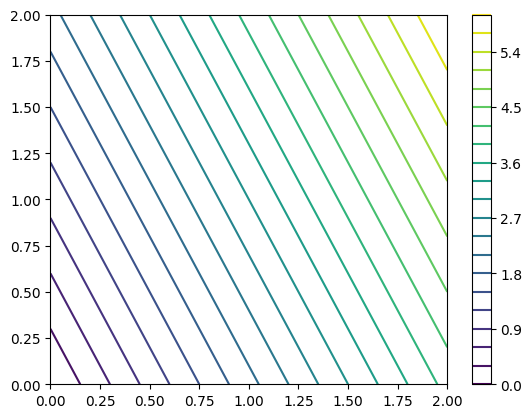

In [25]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X, Y = np.meshgrid(x, y)
z = 2*X + Y

plt.contour(X, Y, z, 20)
plt.colorbar()

In [26]:
z

array([[0, 2, 4],
       [1, 3, 5],
       [2, 4, 6]])